In [10]:
import pandas as pd
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt
import random
from PIL import Image
import tensorflow as tf
from tensorflow.keras import models, layers, losses, activations, regularizers, metrics
from tensorflow.keras import backend as K

In [8]:
# going to create classes in the folders that have the image data
train_class_folders = [os.path.join("CNN_Train", chr(letter)) for letter in range(65, 91)]  # A-Z
test_class_folders =  [os.path.join("CNN_Test", chr(letter)) for letter in range(65, 91)]  # A-Z
def move_images(folder_path, class_folders):
    files = os.listdir(folder_path) # getting all the image names in the directory and storing those under the variable named "files"
    
    for filename in files: # iterating through the image names
        if filename.endswith('.jpg'):  # Going to process only .jpg files (there was a singular csv file in the directory so want to ignore that)
            first_letter = filename[0].upper()  # Geting the first letter of the image name so we can properply classify it into its corresponding class
            
            if 'A' <= first_letter <= 'Z':  # Ensure it's between A and Z #
                class_index = ord(first_letter) - ord('A')  # Convert A-Z to index 0-25
                class_folder = class_folders[class_index]
                
                # # Ensure that the class folder exists; if not, create it
                # if not os.path.exists(class_folder):
                #     os.makedirs(class_folder)
                #     print(f"Created directory: {class_folder}") not necessary ....
                
                old_file_path = os.path.join(folder_path, filename)
                new_file_path = os.path.join(class_folder, filename)
                
                shutil.move(old_file_path, new_file_path)
                print(f"Moved '{filename}' to '{class_folder}'.")

# Move images to the appropriate class folders
move_images("CNN_Train", train_class_folders)
move_images("CNN_Test", test_class_folders)


Created directory: CNN_Train/N
Moved 'N13_jpg.rf.b51614c6e42508cb8623880c906f0fb5.jpg' to 'CNN_Train/N'.
Created directory: CNN_Train/K
Moved 'K14_jpg.rf.b032c719d888e4795800a1a9ec27d7d1.jpg' to 'CNN_Train/K'.
Created directory: CNN_Train/V
Moved 'V6_jpg.rf.6de159f5c0a51aecaa23d4b8015761a3.jpg' to 'CNN_Train/V'.
Created directory: CNN_Train/H
Moved 'H22_jpg.rf.caf6284be939baaa27a8fba14e56023a.jpg' to 'CNN_Train/H'.
Created directory: CNN_Train/Z
Moved 'Z20_jpg.rf.c115813a2f60d4f239546c931101270c.jpg' to 'CNN_Train/Z'.
Created directory: CNN_Train/F
Moved 'F22_jpg.rf.203feff812b6af7fb2f3c76ec919416d.jpg' to 'CNN_Train/F'.
Created directory: CNN_Train/U
Moved 'U4_jpg.rf.db34e86828f1538262e443a02b5f3c29.jpg' to 'CNN_Train/U'.
Created directory: CNN_Train/J
Moved 'J11_jpg.rf.a9e6ab97a4377c361739865881eac00f.jpg' to 'CNN_Train/J'.
Created directory: CNN_Train/S
Moved 'S9_jpg.rf.695f76e3640404b5022746170b2daf3f.jpg' to 'CNN_Train/S'.
Moved 'S23_jpg.rf.ccfd91c75fbec52c6ca4c6359dfff9f0.jpg' to

In [9]:
# now we are going to read in the dataset
# source - https://www.tensorflow.org/tutorials/load_data/images
training_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'CNN_Train',
    image_size = (374,374), # the image size
    batch_size = 1512, # the number of images
)

testing_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'CNN_Test',
    image_size = (374,374), # the image size
    batch_size = 72, # the number of images
)

Found 1512 files belonging to 26 classes.
Found 72 files belonging to 24 classes.


2024-11-19 14:52:26.599576: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


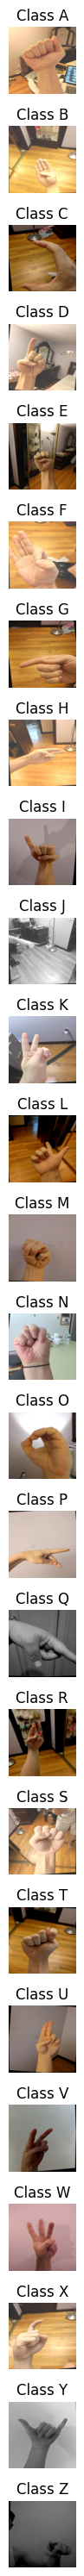

In [11]:
# going to attempt to print an image from each of the classes along with its image


def display_sample_images(class_folders, num_samples_per_class=1):
    """
    Display a few images from each class folder with their proper class labels.
    :param class_folders: List of class folders
    :param num_samples_per_class: Number of images to display from each class
    """
    plt.figure(figsize=(30, 30))  # Set the size of the grid for plotting
    num_images = 0
    total_images_to_show = num_samples_per_class * len(class_folders)

    # Loop over each class folder
    for class_folder in class_folders:
        class_label = os.path.basename(class_folder)  # Extract the class label (e.g., 'A', 'B', etc.)
        
        # Get a list of image filenames in the current class folder
        image_files = [f for f in os.listdir(class_folder) if f.endswith('.jpg')]
        
        # Randomly sample a few image files from this folder
        selected_images = random.sample(image_files, min(num_samples_per_class, len(image_files)))

        for image_file in selected_images:
            image_path = os.path.join(class_folder, image_file)
            
            # Open the image
            img = Image.open(image_path)
            
            # Plot the image
            plt.subplot(len(class_folders), num_samples_per_class, num_images + 1)
            plt.imshow(img)
            plt.title(f"Class {class_label}")
            plt.axis('off')  # Hide axes
            
            num_images += 1
            if num_images >= total_images_to_show:
                break
    
    # Show all the images in the grid
    plt.tight_layout()
    plt.show()

# Call the function to display sample images
display_sample_images(train_class_folders)